In [1]:
%matplotlib inline
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grid2op.Episode import EpisodeData
from grid2op.PlotGrid import PlotMatplot

In [103]:
def add_to_tuple(tup_list, rs_list):
    new_list = []
    if not tup_list:
        for j in rs_list:
            new_list.append(tuple([j]))
    else:
        for i in tup_list:
            for j in rs_list:
                new_list.append(i + tuple([j]))
    return new_list

a=[
    [0,-5,5],
    [0,-10,-5,5,10],
    [0,-15,-10,-5,5,10,15]
]

tup_list = []
for g_rs in a:
    tup_list = add_to_tuple(tup_list, g_rs)

new_tup = []
gix_list = [0,1,5]
for i in tup_list:
    if sum(i) == 0:
        new_tup.append(list(zip(gix_list,i)))

print(new_tup)
print(len(new_tup))

[[(0, 0), (1, 0), (5, 0)], [(0, 0), (1, -10), (5, 10)], [(0, 0), (1, -5), (5, 5)], [(0, 0), (1, 5), (5, -5)], [(0, 0), (1, 10), (5, -10)], [(0, -5), (1, 0), (5, 5)], [(0, -5), (1, -10), (5, 15)], [(0, -5), (1, -5), (5, 10)], [(0, -5), (1, 5), (5, 0)], [(0, -5), (1, 10), (5, -5)], [(0, 5), (1, 0), (5, -5)], [(0, 5), (1, -10), (5, 5)], [(0, 5), (1, -5), (5, 0)], [(0, 5), (1, 5), (5, -10)], [(0, 5), (1, 10), (5, -15)]]
15


In [100]:
step = 5
md = -15
mu = 16
ans = [0]
down_val = -step
while down_val > md:
    ans.append(down_val)
    down_val -= step
ans.append(md)

up_val = step
while up_val < mu:
    ans.append(up_val)
    up_val += step
ans.append(mu)
print(ans)

[0, -5, -10, -15, 5, 10, 15, 16]


In [ ]:
# max_set_point_change = 5
{0: [(0, 0), (1, 10.0), (5, -15.0)], 
1: [(0, 5.0), (1, 10.0), (5, -15.0)], 
2: [(0, 5.0), (1, -10.0), (5, 0)], 
3: [(0, -5.0), (1, 0), (5, 0)], 
4: [(0, 0), (1, 0), (5, 0)], 
5: [(0, 5.0), (1, 0), (5, 0)], 
6: [(0, -5.0), (1, 10.0), (5, 0)], 
7: [(0, -5.0), (1, -10.0), (5, 15.0)], 
8: [(0, 0), (1, -10.0), (5, 15.0)]}

# max_set_point_change = 5 (reorganised)
{0: [(0, 0), (1, 0), (5, 0)], 
1: [(0, -5.0), (1, 0), (5, 0)], 
2: [(0, 5.0), (1, 0), (5, 0)], 
3: [(0, 5.0), (1, -10.0), (5, 0)], 
4: [(0, -5.0), (1, 10.0), (5, 0)], 
5: [(0, 0), (1, 10.0), (5, -15.0)], 
6: [(0, 5.0), (1, 10.0), (5, -15.0)], 
7: [(0, 0), (1, -10.0), (5, 15.0)], 
8: [(0, -5.0), (1, -10.0), (5, 15.0)]}

# specific ramp per generator
# max_set_point_change = 0

{0: [(0, 0), (1, 0), (5, 0)], 
1: [(0, 0), (1, -5), (5, 5)], 
2: [(0, 0), (1, -10.0), (5, 10)], 
3: [(0, 0), (1, 5), (5, -5)], 
4: [(0, 0), (1, 10.0), (5, -10)], 
5: [(0, -5.0), (1, 0), (5, 5)], 
6: [(0, -5.0), (1, -5), (5, 10)], 
7: [(0, -5.0), (1, -10.0), (5, 15.0)], 
8: [(0, -5.0), (1, 5), (5, 0)], 
9: [(0, -5.0), (1, 10.0), (5, -5)], 
10: [(0, 5.0), (1, 0), (5, -5)], 
11: [(0, 5.0), (1, -5), (5, 0)], 
12: [(0, 5.0), (1, -10.0), (5, 5)], 
13: [(0, 5.0), (1, 5), (5, -10)], 
14: [(0, 5.0), (1, 10.0), (5, -15.0)]}

# control_gen = [5]
{0: [(5, 0)], 
1: [(5, -5)], 
2: [(5, -10)], 
3: [(5, -13.0)], 
4: [(5, 5)], 
5: [(5, 10)], 
6: [(5, 13.0)]}

# Limit ramps and 2.5 step
{0: [(0, 0), (1, 0), (5, 0)], 
1: [(0, 0), (1, -2.5), (5, 2.5)], 
2: [(0, 0), (1, -5), (5, 5)], 
3: [(0, 0), (1, 2.5), (5, -2.5)], 
4: [(0, 0), (1, 5), (5, -5)], 
5: [(0, -2.5), (1, 0), (5, 2.5)], 
6: [(0, -2.5), (1, -2.5), (5, 5)], 
7: [(0, -2.5), (1, 2.5), (5, 0)], 
8: [(0, -2.5), (1, 5), (5, -2.5)], 
9: [(0, 2.5), (1, 0), (5, -2.5)], 
10: [(0, 2.5), (1, -2.5), (5, 0)], 
11: [(0, 2.5), (1, -5), (5, 2.5)], 
12: [(0, 2.5), (1, 2.5), (5, -5)]}

{'NO_OVERFLOW_DISCONNECTION': False, 
'IGNORE_MIN_UP_DOWN_TIME': True, 
'ALLOW_DISPATCH_GEN_SWITCH_OFF': True, 
'NB_TIMESTEP_OVERFLOW_ALLOWED': 2, 
'NB_TIMESTEP_RECONNECTION': 10, 
'HARD_OVERFLOW_THRESHOLD': 2.0, 
'ENV_DC': True, # False as default
'FORECAST_DC': False, 
'MAX_SUB_CHANGED': 1, 
'MAX_LINE_STATUS_CHANGED': 1, 
'NB_TIMESTEP_COOLDOWN_LINE': 0, 
'NB_TIMESTEP_COOLDOWN_SUB': 0}

In [ ]:
# max_set_point_change = 0
{0: [(0, 0), (1, 0), (5, 0)], 
1: [(0, 5.0), (1, 10.0), (5, -15.0)], 
2: [(0, -5.0), (1, -10.0), (5, 15.0)]}

In [2]:
def plot_grid(this_episode, obs, show=False, path=None):
    plot_helper = PlotMatplot(observation_space=this_episode.observation_space, width=1920, height=1080)
    plot_helper._line_bus_radius = 7
    fig = plot_helper.plot_obs(obs)
    if show:
        plt.show()
        fig.show()
    if not path is None:
        fig.savefig(path)
    plt.close(fig)

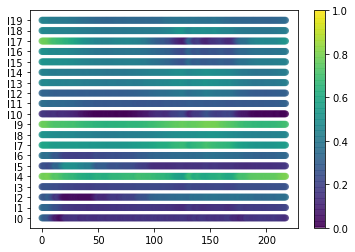

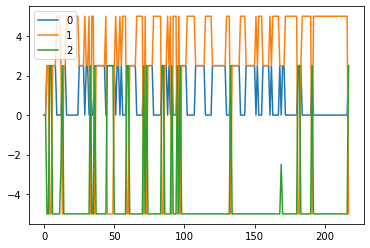

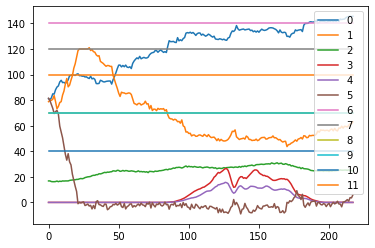

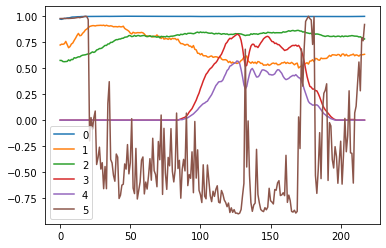

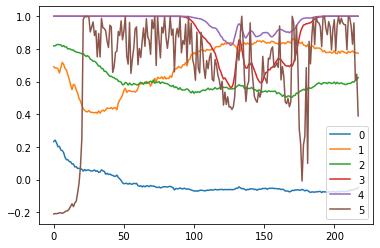

In [58]:
#case = "sandbox_TPH_{}".format("vDoNothing") #vMyPTDFAgent
case = "_AGC_sandbox_D3QN_Di23Reward_(AC_pqp)"
episode_studied = "0005"
path_save = 'D:\\ESDA_MSc\\Dissertation\\code_stuff\\cases\\{}'.format(case)
this_episode = EpisodeData.from_disk(path_save, episode_studied)

plays = this_episode.meta['nb_timestep_played']
obss = copy.deepcopy(this_episode.observations)
act = copy.deepcopy(this_episode.actions)
prod_qs = []
prod_ps = []
#load_v = []
prodp = []
pmax = []
redisp = []
flow = []
for i in range(plays):
    s_gen = np.sqrt(obss[i].prod_p**2 + obss[i].prod_q**2)
    #s_load = np.sqrt(obss[i].load_p**2 + obss[i].load_q**2)
    #ans.append(sum(s_gen)-sum(s_load))
    if act[i].as_dict():
        redisp.append(act[i].as_dict()['redispatch'][obss[i].gen_redispatchable])
    else:
        redisp.append([0,0,0])
    flow.append(obss[i].rho)
    pmax.append(obss[i].gen_pmax)
    prodp.append(obss[i].prod_p)
    prod_ps.append(obss[i].prod_p/s_gen)
    prod_qs.append(obss[i].prod_q/s_gen)
    #load_v.append(obss[i].load_v)
flow = np.array(flow)
fig, a0 = plt.subplots(1)
for lix in range(flow.shape[1]):
    im = a0.scatter(list(range(plays)), ['l{}'.format(lix)]*plays, c=flow[:,lix], vmin=0, vmax=1, alpha=0.7)
fig.colorbar(im, ax=a0)
fig.show()
pd.DataFrame(redisp).plot()
pd.DataFrame(np.hstack((prodp, pmax))).plot()
pd.DataFrame(prod_ps).plot()
pd.DataFrame(prod_qs).plot()
#pd.DataFrame(load_v).plot()

In [46]:
print(this_episode.observations[-1].gen_pmax)
print(this_episode.observations[-1].gen_pmin)

for rts in range(-12,0):
    #print("---({})---".format(rts))
    last_obss = copy.deepcopy(this_episode.observations[rts-1])
    obss = copy.deepcopy(this_episode.observations[rts])
    actt = copy.deepcopy(this_episode.actions[rts])
    s_gen = np.sqrt(obss.prod_p**2 + obss.prod_q**2)
    s_load = np.sqrt(obss.load_p**2 + obss.load_q**2)
    #print(np.round(obss.prod_v - last_obss.prod_v))
    #print(np.round(obss.load_v - last_obss.load_v,2))
    print(obss.prod_p/s_gen)
    print(obss.prod_q/s_gen)
    print(obss.rho[17])
    #print(sum(obss.prod_p)-sum(obss.load_p))
    #print(sum(obss.prod_q)-sum(obss.load_q))
    print("-")
    #print(obss.actual_dispatch)
    print(actt.as_dict())

[140. 120.  70.  70.  40. 100.]
[0. 0. 0. 0. 0. 0.]
[ 0.9968682   0.6045264   0.8126191   0.00546795  0.         -0.17192006]
[-0.07908157  0.79658514  0.5827952   0.9999851   1.          0.9851109 ]
0.46037874
-
{'redispatch': array([ 0.,  5.,  0.,  0.,  0., -5.], dtype=float32)}
[ 0.99702144  0.61815816  0.8196562   0.00550309  0.         -0.16841093]
[-0.0771252  0.7860537  0.5728558  0.9999848  1.         0.9857169]
0.45895654
-
{'redispatch': array([ 0.,  5.,  0.,  0.,  0., -5.], dtype=float32)}
[0.99710786 0.6155844  0.81816334 0.00543094 0.         0.01417068]
[-0.07599941  0.788071    0.5749858   0.99998516  1.          0.9998996 ]
0.45732853
-
{'redispatch': array([ 0.,  5.,  0.,  0.,  0., -5.], dtype=float32)}
[ 0.9972277   0.61734635  0.80921745  0.00542264  0.         -0.0190785 ]
[-0.07441024  0.78669155  0.5875092   0.99998534  1.          0.999818  ]
0.46971098
-
{'redispatch': array([ 0.,  5.,  0.,  0.,  0., -5.], dtype=float32)}
[0.9972738  0.6214244  0.81482095 0.    

In [26]:
cont = 0
for i in range(len(this_episode.actions)):
    if this_episode.actions[i].as_dict():
        cont += 1
print(cont)

0


In [29]:
print(this_episode.observations[-1].gen_pmax)
print(this_episode.observations[-1].gen_pmin)
for rts in range(-12,0):
#for rts in [0,1,2,3,4,5]:
    #step = last_step - rts
    print("---({})---".format(rts))
    obss = copy.deepcopy(this_episode.observations[rts])
    last_act = copy.deepcopy(this_episode.actions[rts-1])
    actt = copy.deepcopy(this_episode.actions[rts])
    print("redispatch: {}".format(actt.as_dict()))
    print("prod_p: {}".format(obss.prod_p))
    print("prod loss: {}".format(np.sum(obss.prod_p)-np.sum(obss.load_p)))
    print("target_d: {}".format(obss.target_dispatch))
    print("actual_d: {}".format(obss.actual_dispatch))
    print("diff redis: {}".format(actt.as_dict()['redispatch'] - last_act.as_dict()['redispatch']))
    #print("safety redis up: {}".format(obss.target_dispatch - obss.gen_pmax))
    #print("safety redis dn: {}".format(obss.target_dispatch + obss.gen_pmax))
    #print("load_p: {}".format(obss.load_p))
    #print("total_load: {}".format(sum(obss.load_p)))
    #print("total_gen: {}".format(sum(obss.prod_p)))

[140. 120.  70.  70.  40. 100.]
[0. 0. 0. 0. 0. 0.]
---(-12)---
redispatch: {'redispatch': array([ 0.,  0.,  0.,  0.,  0., -5.], dtype=float32)}
prod_p: [119.44      50.660442  27.6       13.7        7.4       85.098526]
target_d: [0. 0. 0. 0. 0. 0.]
actual_d: [ 3.2240009e+01 -3.2239559e+01  0.0000000e+00  0.0000000e+00
  0.0000000e+00  2.6645353e-15]
loss: 6.699005126953125
diff redis: [0. 0. 0. 0. 0. 0.]
---(-11)---
redispatch: {'redispatch': array([ 0.,  0.,  0.,  0.,  0., -5.], dtype=float32)}
prod_p: [120.640015  54.160442  27.7       14.8        8.4       82.07415 ]
target_d: [ 0.  0.  0.  0.  0. -5.]
actual_d: [ 34.74001 -29.73956   0.        0.        0.       -5.     ]
loss: 6.574615478515625
diff redis: [0. 0. 0. 0. 0. 0.]
---(-10)---
redispatch: {'redispatch': array([ 0.,  0.,  0.,  0.,  0., -5.], dtype=float32)}
prod_p: [123.240005  55.060444  27.4       15.2        9.        73.76198 ]
target_d: [  0.   0.   0.   0.   0. -10.]
actual_d: [ 37.24001 -27.23956   0.        0. 

In [4]:
this_episode.observations[-1].actual_dispatch[this_episode.observations[-1].gen_redispatchable]

array([-39.596203,  15.833823,  23.762379], dtype=float32)

In [5]:
this_episode.meta

{'backend_type': 'PandaPowerBackend_l2rpn_case14_sandbox',
 'chronics_max_timestep': '8064',
 'chronics_path': 'C:\\Users\\Felipe\\data_grid2op\\l2rpn_case14_sandbox\\chronics\\0018',
 'cumulative_reward': -3652.0,
 'env_seed': None,
 'env_type': 'Environment_l2rpn_case14_sandbox',
 'grid_path': 'C:\\Users\\Felipe\\data_grid2op\\l2rpn_case14_sandbox\\grid.json',
 'nb_timestep_played': 396}

In [6]:
this_episode.params

{'ALLOW_DISPATCH_GEN_SWITCH_OFF': True,
 'ENV_DC': False,
 'FORECAST_DC': False,
 'HARD_OVERFLOW_THRESHOLD': 2.0,
 'IGNORE_MIN_UP_DOWN_TIME': True,
 'MAX_LINE_STATUS_CHANGED': 1,
 'MAX_SUB_CHANGED': 1,
 'NB_TIMESTEP_COOLDOWN_LINE': 0,
 'NB_TIMESTEP_COOLDOWN_SUB': 0,
 'NB_TIMESTEP_OVERFLOW_ALLOWED': 2,
 'NB_TIMESTEP_RECONNECTION': 10,
 'NO_OVERFLOW_DISCONNECTION': False}

In [6]:
last_step = this_episode.meta['nb_timestep_played']

In [7]:
print(this_episode.observations[-1].n_gen)
print(this_episode.observations[-1].n_line)
print(this_episode.observations[-1].n_load)

6
20
11


In [8]:
print(this_episode.observations[-1].name_line)
print(this_episode.observations[-1].name_gen)
print(this_episode.observations[-1].name_load)

['0_1_0' '0_4_1' '1_2_2' '1_3_3' '1_4_4' '2_3_5' '3_4_6' '5_10_7' '5_11_8'
 '5_12_9' '8_9_10' '8_13_11' '9_10_12' '11_12_13' '12_13_14' '3_6_15'
 '3_8_16' '4_5_17' '6_7_18' '6_8_19']
['gen_1_0' 'gen_2_1' 'gen_5_2' 'gen_5_3' 'gen_7_4' 'gen_0_5']
['load_1_0' 'load_2_1' 'load_3_2' 'load_4_3' 'load_5_4' 'load_8_5'
 'load_9_6' 'load_10_7' 'load_11_8' 'load_12_9' 'load_13_10']


In [7]:
# observations: from 0 to last_step (last_step+1)
# actions: from 0 to last_step-1 (last_step)
# last_step = -1
print(this_episode.observations[-1].timestep_overflow)
print(this_episode.actions[1093].as_dict())
print(this_episode.observations[1094].gen_pmax)
print(this_episode.observations[1094].prod_p)
print(this_episode.observations[1094].gen_max_ramp_up)
print(this_episode.observations[-1].target_dispatch)
print(this_episode.observations[-1].actual_dispatch)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
{'redispatch': array([5., 0., 0., 0., 0., 0.], dtype=float32)}
[140. 120.  70.  70.  40. 100.]
[165.88998   86.40002   16.7        0.         0.        24.911898]
[ 5. 10.  0.  0.  0. 15.]
[137.28998  30.        0.        0.        0.      -45.     ]
[ 70.689995  -4.19998    0.         0.         0.       -66.49    ]


In [30]:
np.round(np.concatenate([np.array([2,3]), this_episode.observations[1094].rho]), 2)

array([2.  , 3.  , 0.03, 0.28, 0.1 , 0.29, 0.96, 0.55, 0.28, 0.68, 0.62,
       0.92, 0.32, 0.45, 0.38, 0.55, 0.5 , 0.62, 0.62, 1.02, 0.55, 0.56])

In [14]:
getattr(this_episode.observations[-1], 'prod_p')

array([ 34.819992, 135.79    ,  12.3     ,   0.      ,   0.      ,
       117.44876 ], dtype=float32)

In [15]:
getattr(this_episode.observations[-1], 'gen_pmax')

array([140., 120.,  70.,  70.,  40., 100.], dtype=float32)

In [5]:
this_episode.observations[0].gen_redispatchable

array([ True,  True, False, False, False,  True])

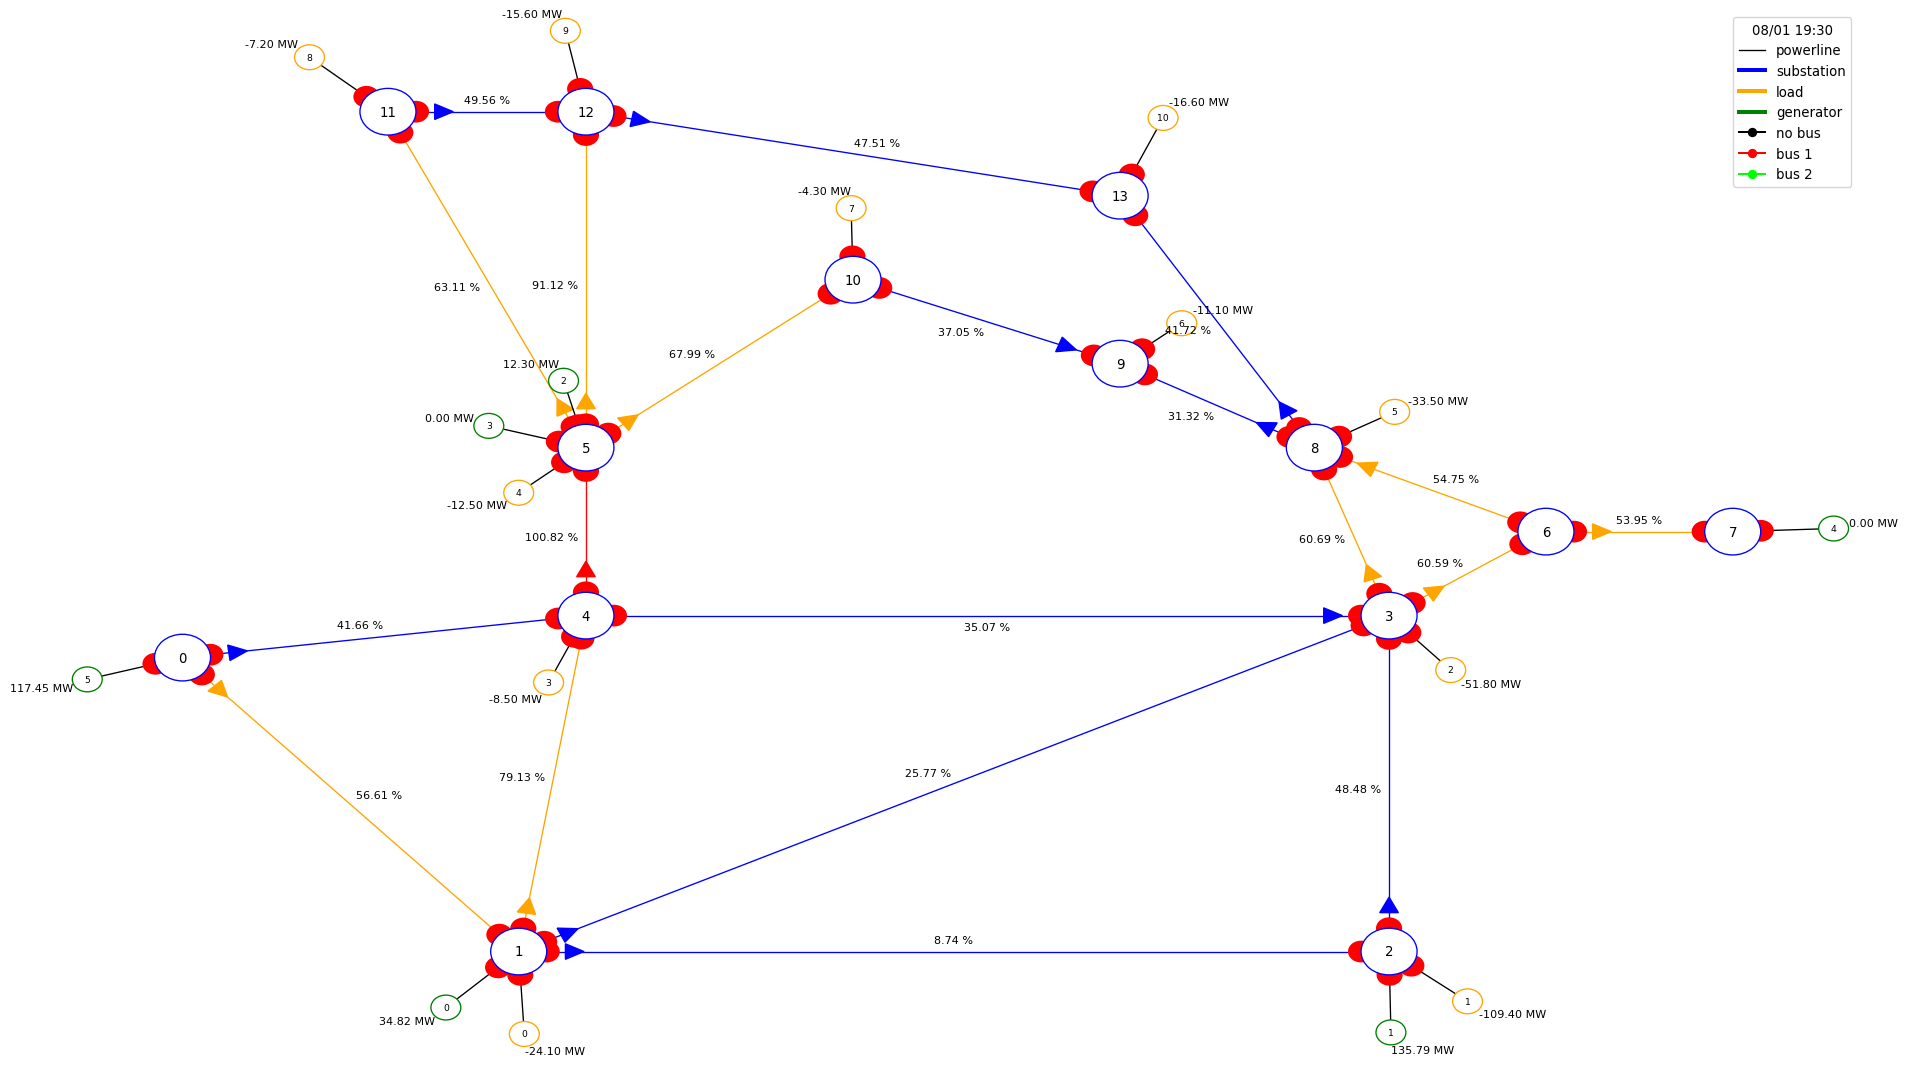

In [46]:
obs = copy.deepcopy(this_episode.observations[-1])
plot_grid(this_episode, obs, show=True)

In [10]:
obs.gen_pmax

array([140., 120.,  70.,  70.,  40., 100.], dtype=float32)

In [6]:
#case2 = "14_redisp_{}".format("vDoNothing")
case2 = "ddqn_tests_sandbox_vDoNothing"
episode_studied2 = "0000"
path_save2 = 'D:\\ESDA_MSc\\Dissertation\\code_stuff\\cases\\{}'.format(case2)
this_episode2 = EpisodeData.from_disk(path_save2, episode_studied2)

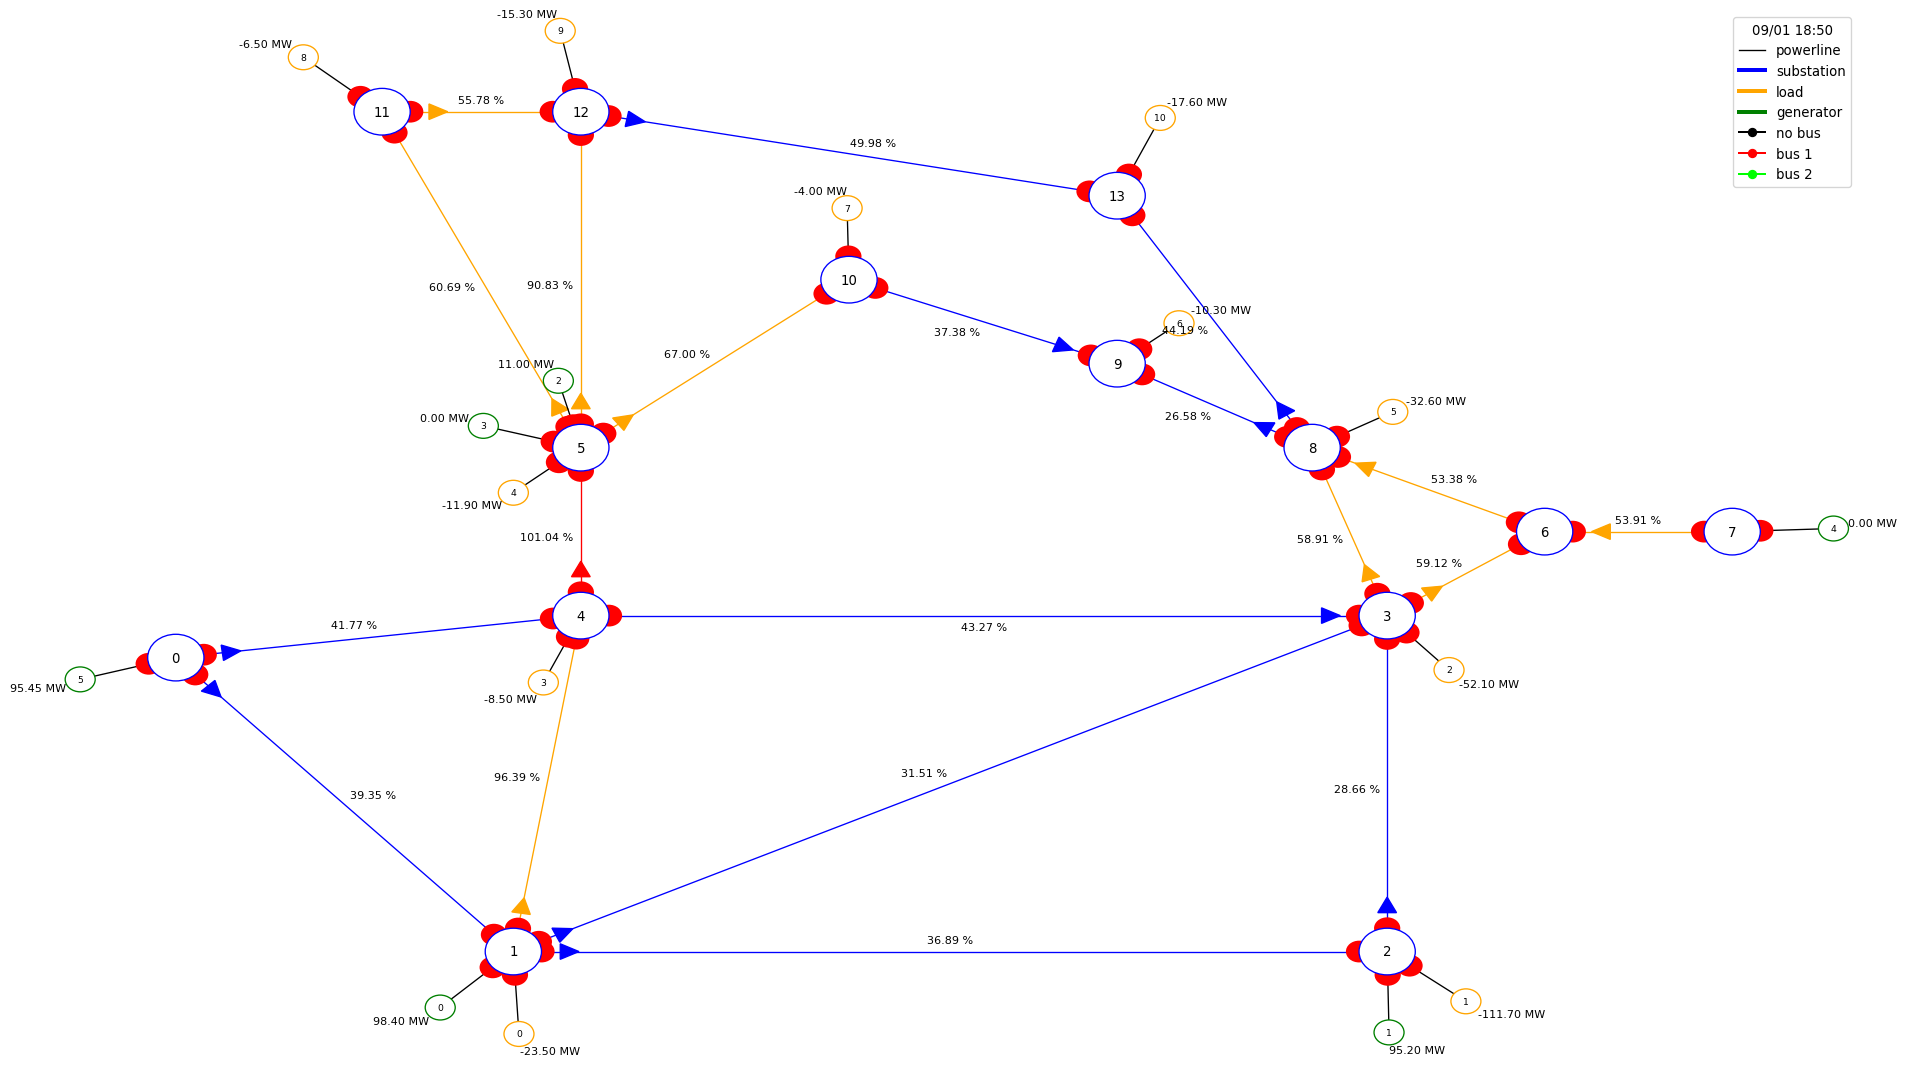

In [14]:
obs2 = copy.deepcopy(this_episode2.observations[-1])
plot_grid(this_episode2, obs2, show=True)

In [79]:
len(this_episode2.observations) - 7262

803

In [71]:
len(this_episode.observations) - 2018

803

# Actions

In [7]:
acts = copy.deepcopy(this_episode.actions[-1])

In [9]:
for reversed_ts in [-4, -3, -2, -1]:
    print("---{}---".format(reversed_ts))
    obss = copy.deepcopy(this_episode.observations[reversed_ts])
    actt = copy.deepcopy(this_episode.actions[reversed_ts-1])
    print("flows: \n{}".format(obss.rho))
    print("actions: \n{}".format(actt.as_dict()))

----4---
flows: 
[0.4035887  0.28172147 0.05400768 0.17827842 0.51917017 0.47519627
 0.30705556 0.70511854 0.5975127  0.88839114 0.02909808 0.35060787
 0.39902186 0.5177677  0.51614994 0.4463637  0.44524428 0.5137364
 0.5102076  0.47130626]
actions: 
{'redispatch': array([-5.,  0.,  0.,  0.,  0.,  5.], dtype=float32)}
----3---
flows: 
[0.39483288 0.27713943 0.06008688 0.17624298 0.5136996  0.4793004
 0.30348423 0.7085828  0.60014504 0.8947224  0.03396535 0.34748894
 0.4035797  0.52622694 0.5168122  0.44206706 0.44331318 0.5073319
 0.51500213 0.4769128 ]
actions: 
{'redispatch': array([-5.,  0.,  0.,  0.,  0.,  5.], dtype=float32)}
----2---
flows: 
[0.387353   0.27083126 0.06475722 0.17232238 0.5012203  0.47698557
 0.29945514 0.71828467 0.6004219  0.89503986 0.03841902 0.34984908
 0.40924174 0.5267748  0.52744544 0.43243587 0.43558422 0.48466513
 0.51913226 0.4791714 ]
actions: 
{'redispatch': array([-5.,  0.,  0.,  0.,  0.,  5.], dtype=float32)}
----1---
flows: 
[0.3800135  0.26803073 

In [97]:
for i in range(500):
    a = this_episode.actions[i].as_dict()
    if not a:
        continue
    else:
        print(i) 

379
381
382


In [98]:
for ts in [377, 378, 379, 380, 381, 382]:
    print("---{}---".format(ts))
    obss = copy.deepcopy(this_episode.observations[ts])
    actt = copy.deepcopy(this_episode.actions[ts])
    print("flows: \n{}".format(obss.rho))
    print("actions: \n{}".format(actt.as_dict()))

---377---
flows: 
[0.9077451  0.74634594 0.08380599 0.6458     0.18901864 0.
 0.3350338  0.604302   0.77114445 0.         0.55253637 0.34762487
 0.24850507 0.09866665 0.         0.3763542  0.28463873 0.71053034
 0.35700423 0.7174461 ]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---378---
flows: 
[0.90796304 0.7479381  0.08346985 0.64216554 0.19054852 0.
 0.33261234 0.6081431  0.77448994 0.         0.55535626 0.35220352
 0.24982613 0.09711898 0.         0.3737889  0.2833688  0.7039204
 0.3581407  0.71618044]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---379---
flows: 
[0.93165284 0.75560194 0.08450273 0.638745   0.18747827 0.
 0.33345863 0.6135105  0.77718914 0.         0.5543526  0.35513347
 0.24674284 0.09895412 0.         0.3747942  0.2830471  0.7103244
 0.35444832 0.71287006]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---380---
flows: 
[0.8959015  0.74580145 0.08375215 0.63740385 0.18688105 0

In [104]:
a = copy.deepcopy(this_episode.observations[-2017].line_status)
hex(int(''.join(['1' if x else '0' for x in a]), 2))

'0xfbbdf'

# Tensorflow read

In [73]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [74]:
import os
import pandas as pd

In [79]:
file_name = 'events.out.tfevents.1597264277.MSI.19216.876.v2'
log_path = 'D:\\ESDA_MSc\\Dissertation\\code_stuff\\cases\\Presentation1_August13th\\prstOne_sandbox_MyDDQN_25000it\\tf_logs_DDDQN\\MyDDQN_ddqn'
file_path = os.path.join(log_path, file_name)

In [80]:
event_acc = EventAccumulator(file_path)
event_acc.Reload()

In [81]:
pd.DataFrame(event_acc.Tensors('mean_reward'))

,wall_time,step,tensor_proto
0,1.597264e+09,1512,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
1,1.597265e+09,9688,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
2,1.597265e+09,10136,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
3,1.597265e+09,12768,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
4,1.597265e+09,17024,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
5,1.597265e+09,17136,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
6,1.597265e+09,17192,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
7,1.597265e+09,19880,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
8,1.597265e+09,23856,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...
9,1.597265e+09,25088,dtype: DT_FLOAT\ntensor_shape {\n}\ntensor_con...


In [82]:
cols = ['wtime', 'step', 'reward', 'alive', 'reward100', 'alive100', 'loss', 'lr']
res = pd.DataFrame()
for metric in ['mean_reward', 'mean_alive', 'mean_reward_100', 'mean_alive_100', 'loss', 'lr']:
    if res.empty:
        res = pd.DataFrame([(w, s, tf.make_ndarray(t)) for w, s, t in event_acc.Tensors(metric)])
    else:
        res  = pd.concat([res, pd.DataFrame([(tf.make_ndarray(t)) for w, s, t in event_acc.Tensors(metric)])], axis=1)
res.columns = cols
print(res)

wtime   step     reward        alive     reward100     alive100  \
0  1.597264e+09   1512  12573.273   802.000000  12573.273438   802.000000   
1  1.597265e+09   9688  16891.371  1058.666626  16891.371094  1058.666626   
2  1.597265e+09  10136  15908.837   996.299988  15908.836914   996.299988   
3  1.597265e+09  12768  14391.272   899.428589  14391.272461   899.428589   
4  1.597265e+09  17024  12769.832   795.619019  12769.832031   795.619019   
5  1.597265e+09  17136  12769.832   795.619019  12769.832031   795.619019   
6  1.597265e+09  17192  12769.832   795.619019  12769.832031   795.619019   
7  1.597265e+09  19880  12323.368   768.119995  12323.368164   768.119995   
8  1.597265e+09  23856  11463.626   712.545471  11463.625977   712.545471   
9  1.597265e+09  25088  11085.886   688.194458  11085.885742   688.194458   

        loss       lr  
0  34.139099  0.00001  
1   2.509909  0.00001  
2   0.061829  0.00001  
3   0.037944  0.00001  
4   0.039351  0.00001  
5   0.044140  0.00